In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#train and test 
from sklearn.model_selection import train_test_split
#the Model 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings("ignore")

# Data Clean and Preprocossing 

In [216]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [218]:
df.shape

(614, 13)

In [219]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [220]:
col_mode=['Gender','Married','Dependents','Self_Employed']
col_mean=['LoanAmount','Loan_Amount_Term','Credit_History']


num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[col_mean] = num_imputer.fit_transform(df[col_mean])

df[col_mode] = cat_imputer.fit_transform(df[col_mode])

In [221]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [222]:
df.duplicated().sum()

np.int64(0)

In [223]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP002990,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,614,2,Male,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,614,2,Yes,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,614,4,0,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,614,2,No,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,NaN,NaN,NaN,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,NaN,NaN,NaN,342.410423,64.428629,12.0,360.0,360.0,360.0,480.0


In [224]:
df.drop(['Loan_ID'],axis=1,inplace=True)  

In [225]:
# EDA

Text(0.5, 1.0, 'Gender Distribution')

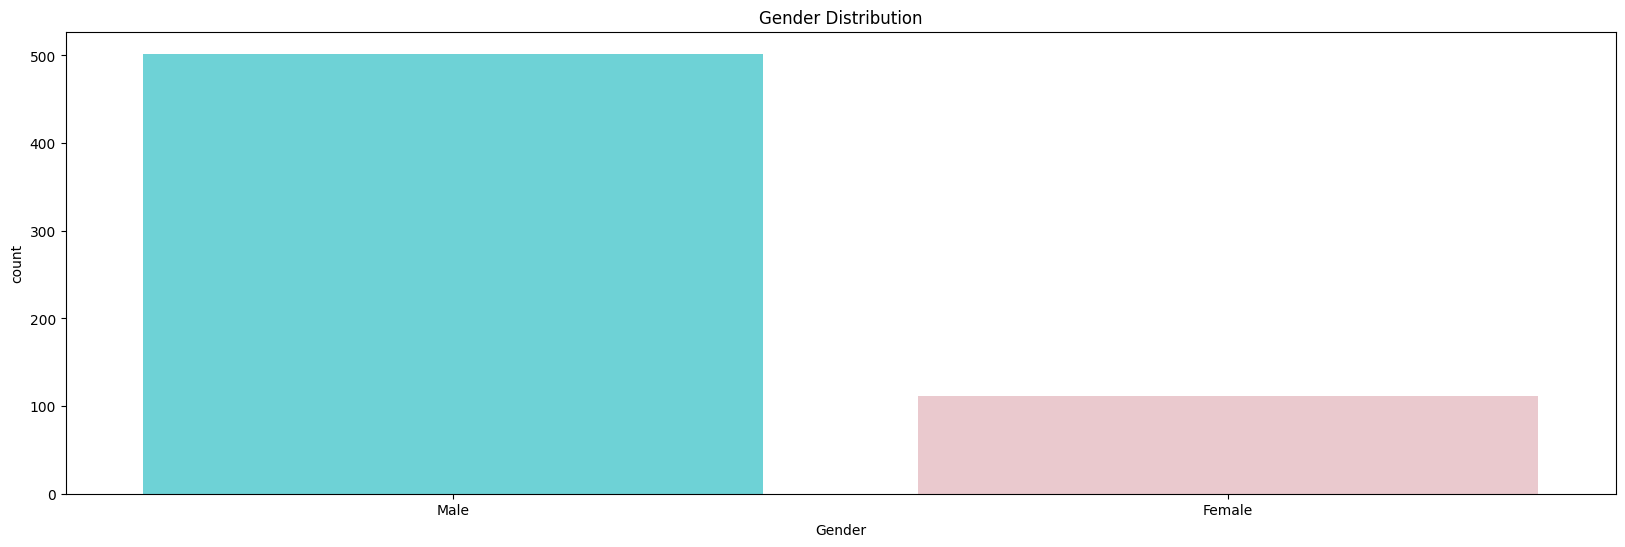

In [226]:
plt.figure(figsize=(20,6))
color=["#5DE2E7","#EFC3CA"]
sns.barplot(df.Gender.value_counts(),palette=color)
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Married Distribution')

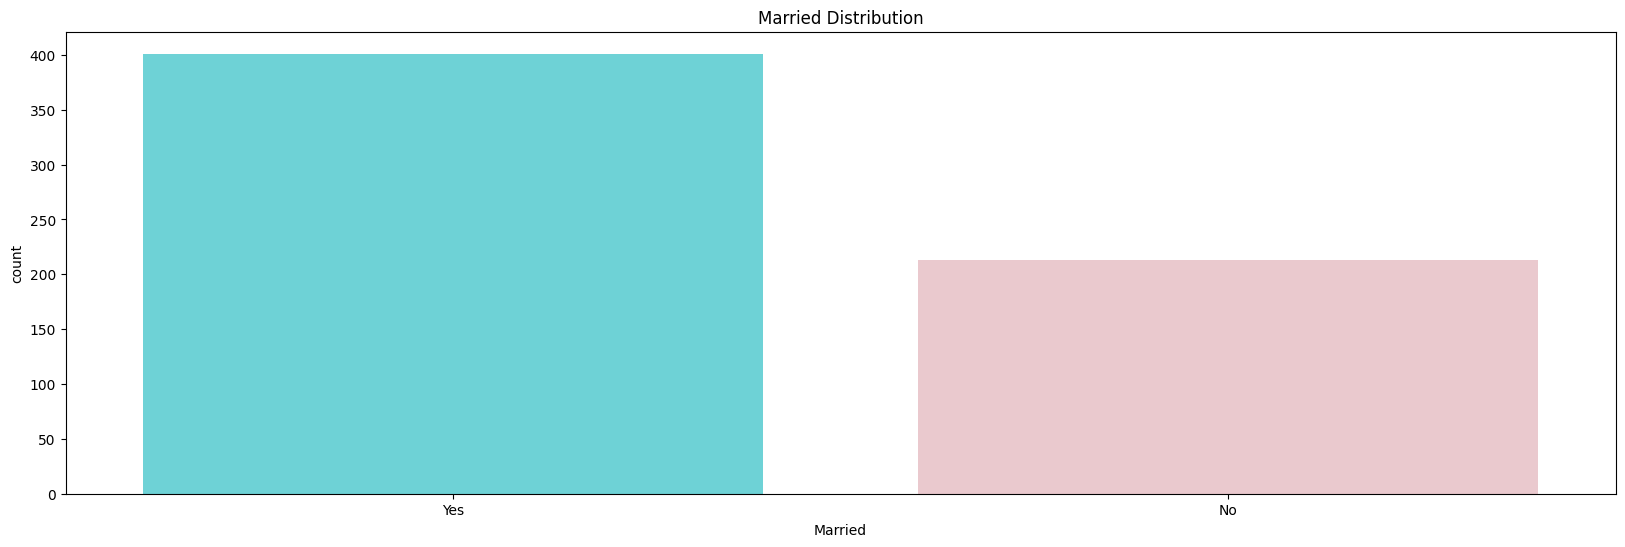

In [227]:
plt.figure(figsize=(20,6))
color=["#5DE2E7","#EFC3CA"]
sns.barplot(df.Married.value_counts(),palette=color)
plt.title("Married Distribution")

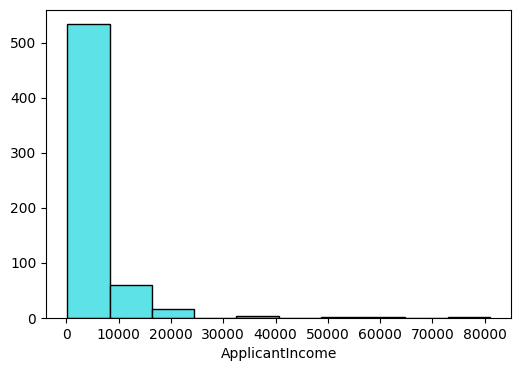

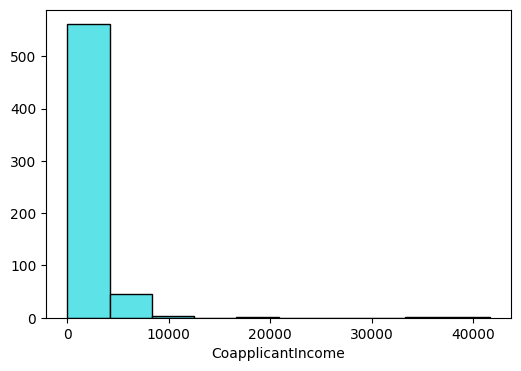

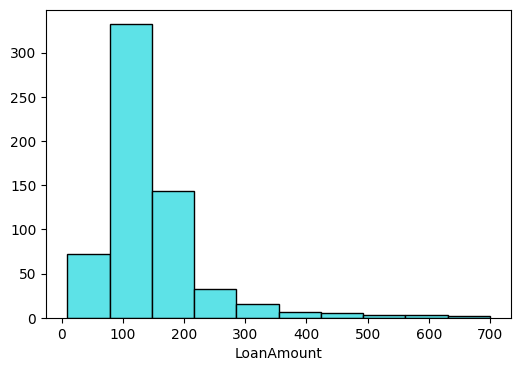

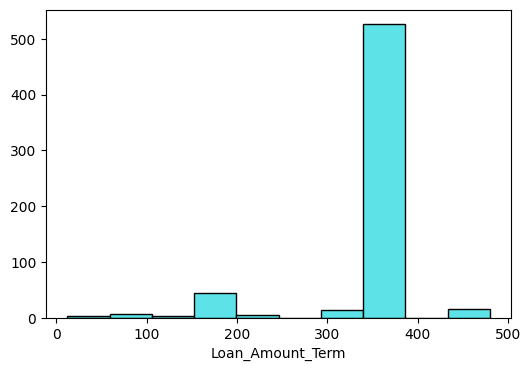

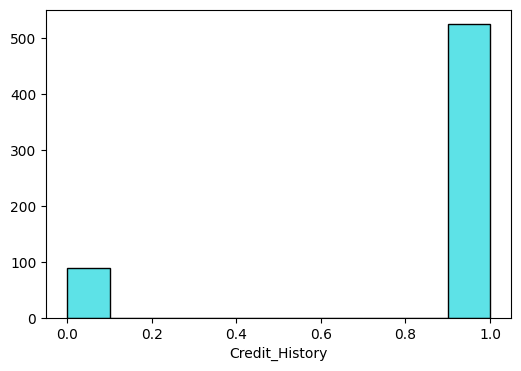

In [228]:
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.hist(df[i], bins=10, color='#5DE2E7', edgecolor='black')
    plt.xlabel(i)

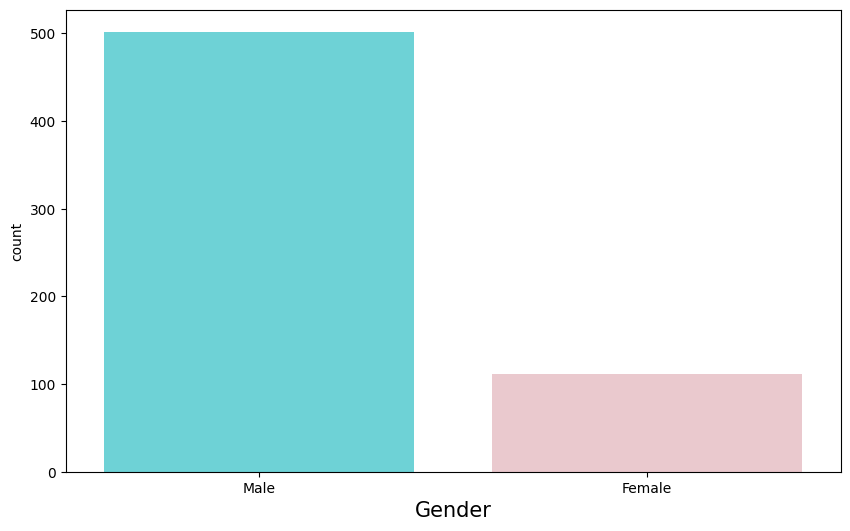

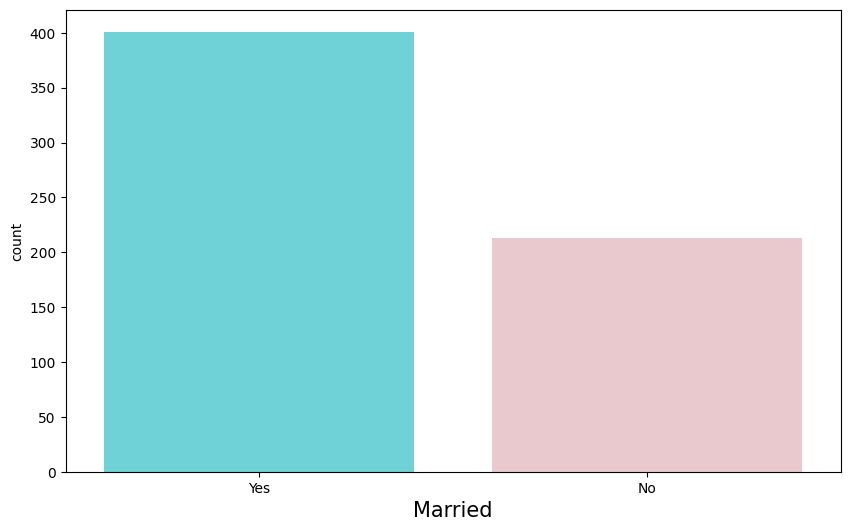

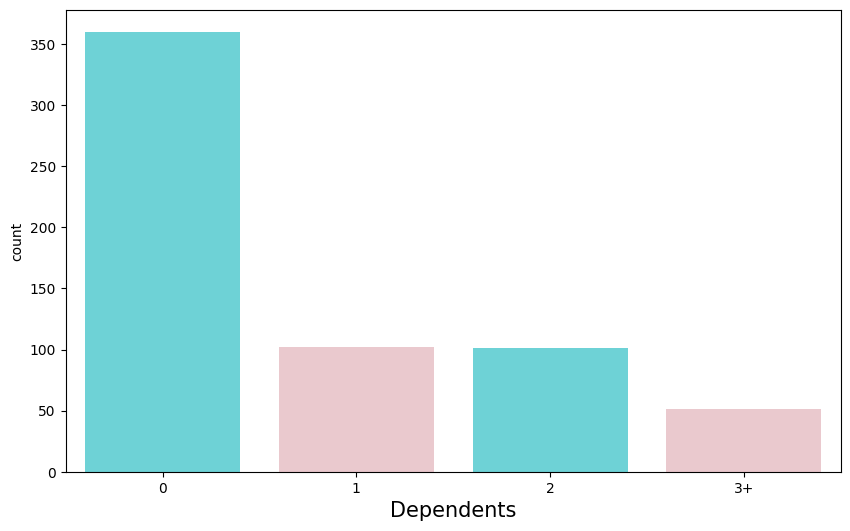

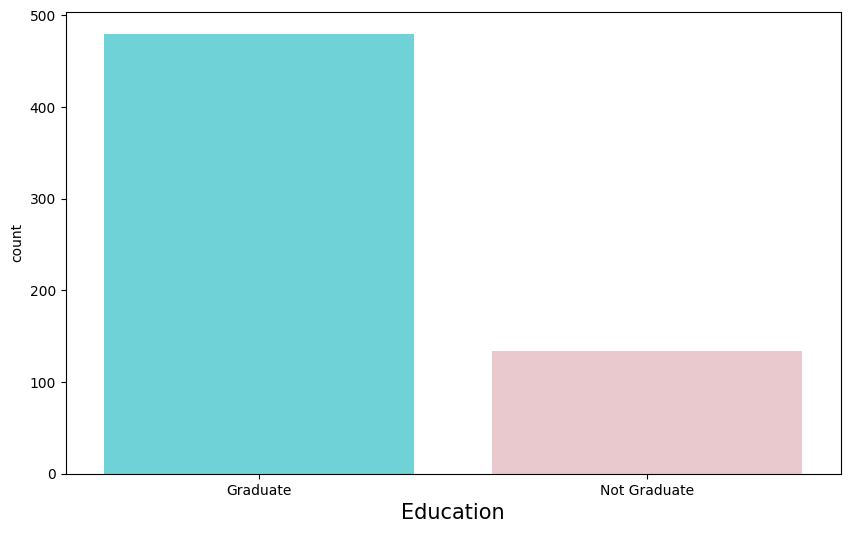

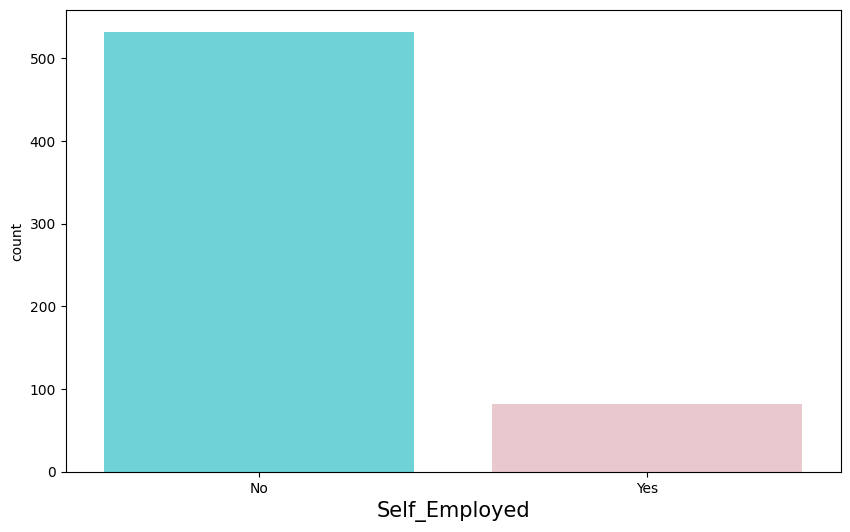

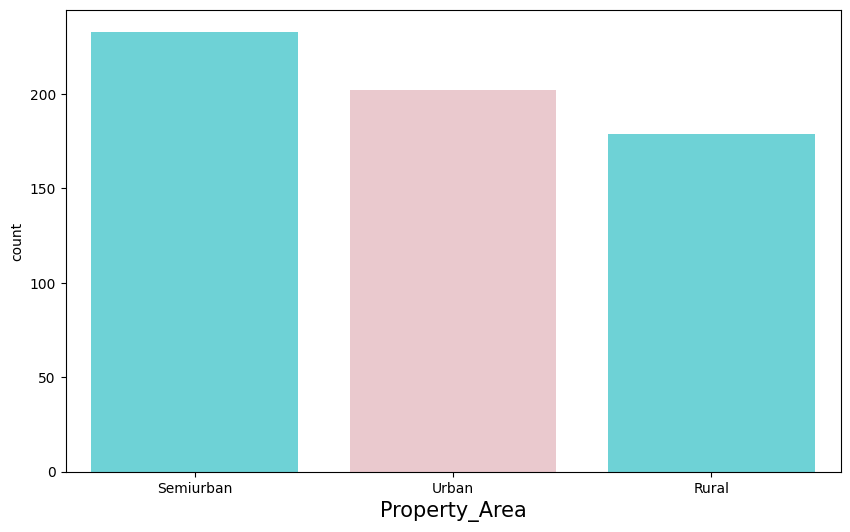

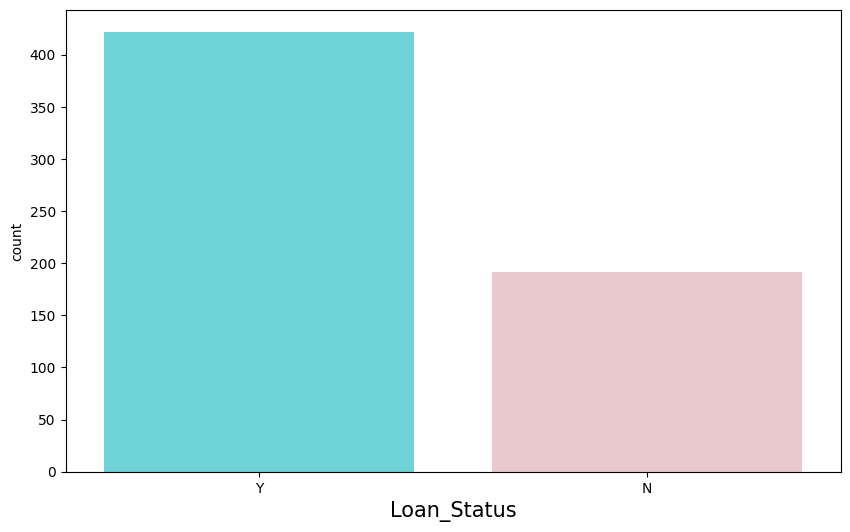

In [229]:
for i in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.barplot(df[i].value_counts(),palette=color)
    plt.xlabel(i,fontsize=15)

In [230]:
la=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i]=la.fit_transform(df[i])

<Axes: >

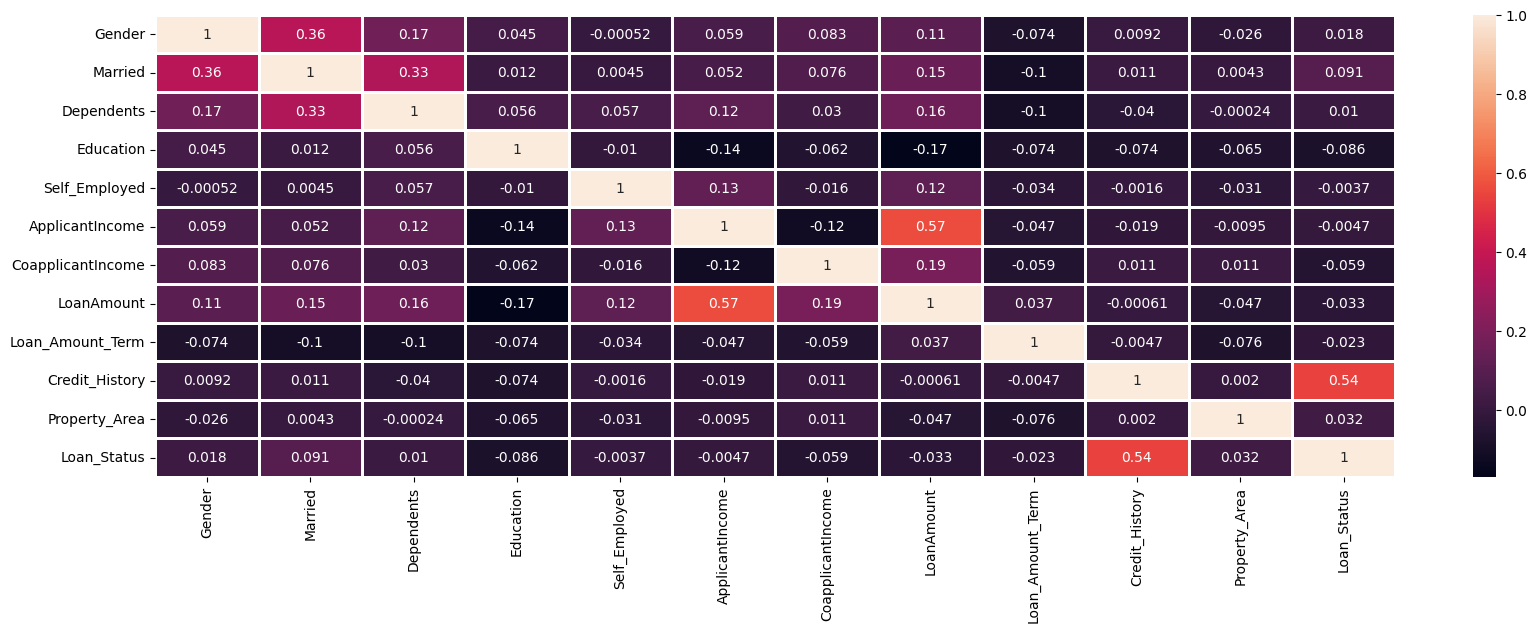

In [231]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,linewidths=1)

# Train and Test

In [232]:
target="Loan_Status"

x=df.drop(target,axis=1)
y=df[target]

In [233]:
#split the data

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)


In [234]:
smote=SMOTE()
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)

In [235]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

# Model 1:SVC

In [240]:
param_dist = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3, 4]
}
model=SVC()

model = GridSearchCV (
    model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)


TypeError: __init__() got an unexpected keyword argument 'param_distributions'

In [239]:
model.fit(xtrain,ytrain)

SVC()

In [ ]:
ypred=model.predict(xtest)

In [ ]:
acc=accuracy_score(ytest,ypred)
print("SVC Accuracy:", acc*100)
report = classification_report(ytest, ypred)
print("The Report:\n", report)


SVC Accuracy: 83.73983739837398
The Report:
               precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



# Model 2:Random Forest Classifier

In [ ]:
model_rf=RandomForestClassifier(random_state=42)

param_dist_rf={
  'n_estimators':[100,200,300],
  'max_depth':[None,10,20,30],
  'min_samples_split':[2,5,10],
  'min_samples_leaf':[1,2,4]

}

model_rf=GridSearchCV (
  model_rf,
  param_distributions=param_dist_rf,
  n_iter=10,
  cv=5,
  scoring='accuracy',
  n_jobs=-1,
  verbose=1,
)

In [ ]:
model_rf.fit(xtrain,ytrain)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [ ]:
ypred_rf=model_rf.predict(xtest)

In [ ]:
acc_rf=accuracy_score(ytest,ypred_rf)
print("Random Forest Classifier Accuracy:", acc_rf*100)
report = classification_report(ytest, ypred)
print("The Report:\n", report)

Random Forest Classifier Accuracy: 77.23577235772358
The Report:
               precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123

